# 3.5 无监督学习

所谓无监督学习，是指在没有被标记的样本上解决模式识别中的各种问题。在上一节提到的有监督学习中，最重要信息就是带标签的数据集，类别标签是机器学习的基准之一。若没有这些标签信息作为监督，则此类机器学习算法就是就是无监督学习算法。

sklearn也提供了多种无监督学习算法，例如聚类、降维、异常值检测、流形学习等。这类算法也提供了许多接口，用法与有监督学习算法接口类似。

## 3.5.1 数据降维实战

数据降维是机器学习中处理高维数据重要手段之一，将较高的维度变化为较低的维度，可以有效提高数据的处理效率。常用的数据降维方法有主成分分析（Principal Component Analysis，PCA）和线性判别分析（Linear Discriminant Analysis，LDA）等经典算法。

下面将应用这两种方法对鸢尾花（Iris）数据集中的数据进行降维处理，并将结果可视化，以对比两种方法的数据分类效果。Iris 数据集是sklearn提供的小型标准数据集，含有150个样本，样本具有4个属性：萼片长度、萼片宽度、花瓣长度和花瓣宽度，每个样本的标签是3种鸢尾花子类别（Setosa、Versicolour 和 Virginica）之一。

Sklearn中的decomposition模块中提供了主成分分析模型PCA，discriminant_analysis模块提供了线性判别分析模型LDA。代码示例如下：


In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris()
X, y, target_names = iris.data, iris.target, iris.target_names
titles=['PCA','LDA']
pca = PCA(n_components=2)  # 实例化，定义一个PCA模型，选择前两个主成分
lda = LinearDiscriminantAnalysis(n_components=2)  # 实例化，定义一个LDA模型
X_rs=[]
X_rs.append( pca.fit(X).transform(X))  # 训练PCA模型,训练结果添加到X_rs中
X_rs.append( lda.fit(X, y).transform(X))  # LDA训练模型,训练结果添加到X_rs中


两种方法降维后的数据特征变为了2列，分别存储到X_rs列表中，下面将进行可视化展示：

<IPython.core.display.Javascript object>


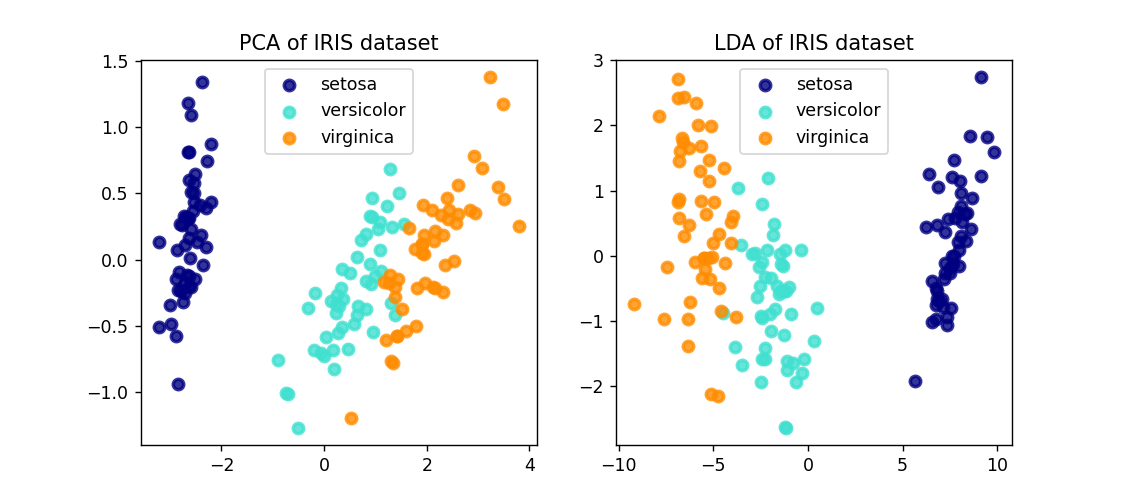

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(9,4))
colors = ["navy", "turquoise", "darkorange"]  # 设置类别颜色颜色
for title, X_r, k in zip(titles, X_rs, [0, 1]):
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax[k].scatter(
            X_r[y==i,0],X_r[y==i,1],color=color,alpha=0.8,lw=2,label=target_name
        )
        ax[k].legend(loc="best", shadow=False, scatterpoints=1)
        ax[k].set_title("%s of IRIS dataset"%title)

从图中可以看出，降维后的数据最大程度上保留了各类数据的区分性。PCA作为无监督学习的一种方法，可以获得与有监督学习效果相近的结果。

## 3.5.2 聚类分析实战

sklearn的cluster模块提供了大部分的聚类算法。下面将以手写数字数据集为例，介绍基于最经典的K-均值算法进行聚类的方法，以及进行聚类效果评估的方法。K-均值算法通过把样本分离成多个具有相同方差的类的方式来聚集数据，其标准为最小化惯量（inertia）或簇内平方和（within-cluster sum-of-squares）。它可以很好地扩展到大量样本的数据集的情况中，并已经被广泛应用于许多不同的领域中。具体实现原理请读者参考其他资料，在此只给出cluster模块中的K均值聚类模型KMeans的使用方法。

使用KMeans在进行实例化时，需要设置要聚类的类别数，通过参数n_clusters设置，此外，还可以通过参数init设置聚类中心初始化方法，如init的默认值为'k-means++'，表示以智能方式为 k 均值聚类选择初始聚类中心，以加快收敛速度；设置为'random'，表示从初始质心中随机选择。此外，为了避免聚类算法陷入局部最小值，因此可以使用不同的质心种子运行的多次，可通过n_init参数设置初始化次数。由于K-均值算法是迭代算法，可通过max_iter设置单次运行的最大迭代次数。KMeans在调用时，参数还是比较多的，上面介绍的是几个主要的参数，当然所有参数都可以使用默认值。

下面给出代码示例，首先加载数据：


In [4]:
import numpy as np
from sklearn.datasets import load_digits
data, labels = load_digits(return_X_y=True)  # 得到所有样本特征和标签
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
# 答印数据集参数
print(f"#digits: {n_digits}; #samples: {n_samples}; #features: {n_features}")

#digits: 10; #samples: 1797; #features: 64


通过结果可以得到，数据集标签共有10类，也就是数字0到9，样本有1797个，每个样本特征数为64，也就是8*8的数字图像的像素灰度值。

接下来调用KMeans进行聚类：


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=4, random_state=0)
kmeans.fit(data)
y=kmeans.labels_[:100]
print(y)  # 打印聚类结果前100个样本的类别标签
print(kmeans.cluster_centers_.shape)  # 打印存储各类别类中心的数组的形状


[5 7 7 1 0 3 9 4 3 3 5 6 8 1 0 2 9 4 7 3 5 6 8 1 6 2 9 4 7 3 5 3 2 2 9 2 5
 3 7 3 7 0 6 4 4 1 2 6 5 5 7 7 4 7 4 5 6 7 9 1 1 4 1 1 0 9 9 9 0 7 6 2 5 3
 2 6 7 6 5 5 6 4 9 1 8 6 4 0 9 1 6 1 1 7 4 7 7 0 1 7]
(10, 64)


为了将结果显示到2维空间，即平面坐标系中，可视化之前应先对原始样本降维：

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # 实例化，定义一个PCA模型，选择前两个主成分
X_r= pca.fit_transform(data[:100])  # 值对前100个样本进行降维用于可视化。

下面应用matplotlib工具包对聚类结果进行可视化。

<IPython.core.display.Javascript object>


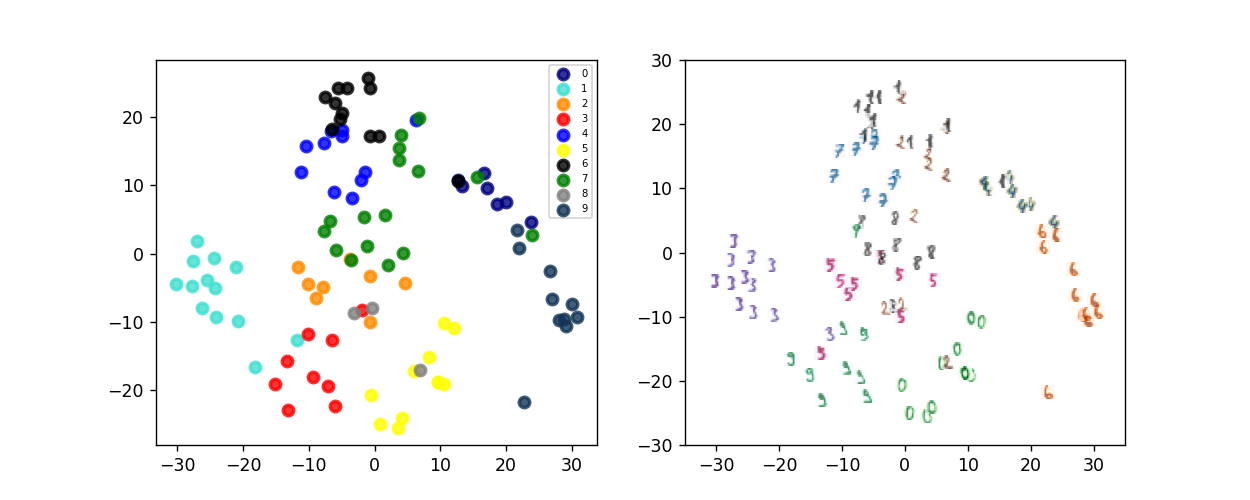

In [8]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(10,4))  # 分左右两个子图显示可视化效果
# 设置左子图绘制颜色
colors=['navy', 'turquoise', 'darkorange', 'red', 'blue',
 'yellow', 'black', 'green', 'grey', '#123456']  
# 设置右子图绘制颜色，因左右子图绘制方式不同，颜色不能通用
cmapcolors=['Greens', 'Greys', 'pink_r', 'Purples', 'gist_earth_r',
 'PuRd', 'Oranges', 'PuBu', 'gray_r', 'BuGn']  
# 绘制左子图，用不同颜色的点代表样本
for color, i in zip(colors, range(10)):
    ax[0].scatter(X_r[y==i, 0], X_r[y==i, 1], color=color, alpha=0.8, lw=2, label=str(i))
    ax[0].legend(loc="best", shadow=False, scatterpoints=1, fontsize='xx-small')
# 绘制右子图，直接显示不同颜色的数字图像
ax[1].set_xlim(-35,35)
ax[1].set_ylim(-30,30)
for i in  range(100):
    imagebox=OffsetImage(data[i].reshape(8,8),zoom=1,cmap=cmapcolors[labels[i]], alpha=0.65)
    ab = AnnotationBbox(imagebox, xy=X_r[i], frameon=False)
    ax[1].add_artist(ab)


通过图中的样本点，可以看到各类别样本基本聚在了一起，但也有一些样本距离类中心较远。聚类算法的性能评价指标也有很多，如类内总距离平方和、同质性度量、完整性度量、调和平均值、ARI指数、AMI指数、轮廓系数等等。Sklearn的metrics模块也提供了聚类算法各种性能指标的评价方法。

下面将通过参数init来设置三种不同的聚类中心初始化方法，对KMeans算法进行性能测试。


In [11]:
from time import time
from sklearn import metrics  # 该模块用于指标计算
from sklearn.pipeline import make_pipeline  # 该模块用于多个操作连成管道统一处理
from sklearn.preprocessing import StandardScaler  # 该模块用于数据归一化
print(69 * "_")  #打印分割线
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI")  # 打印表头
print(69 * "_")
pca = PCA(n_components=10).fit(data)  # 将样本降维到10
# 以下分别定义5种聚类初始方法的参数
init_name = ['k-means++(1)', 'k-means++(4)', 'random(1)', 'random(4)', 'PCA']
init_param = ['k-means++', 'k-means++', 'random', 'random', pca.components_]
n_init_v =[1,4,1,4,1]

for n_init, name, init in zip(n_init_v, init_name, init_param):
    # 应用不同参数进行实例化
    kmeans = KMeans(init=init, n_clusters=n_digits, n_init=n_init, random_state=2)
    # 计算此时模型各项指标并输出
    t0 = time()
# 使用管道执行聚类算法
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0  # 得到训练时间
    results = [name, fit_time, estimator[-1].inertia_]  # 第3项为类内总距离平方和
    # 定义需要计算的性能指标，以下指标值越大代表性能越好
    clustering_metrics = [
        metrics.homogeneity_score,  # 同质性度量
        metrics.completeness_score,  # 完整性度量
        metrics.v_measure_score,  # 调和平均值
        metrics.adjusted_rand_score,  # ARI指数
        metrics.adjusted_mutual_info_score,  # AMI指数
]
# 利用原始标签和预测得到的标签得到每个性能指标值
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]
    # 展示评估指标结果
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results)) 
print(69 * "_")  

_____________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI
_____________________________________________________________________
k-means++(1)	0.015s	70413	0.667	0.724	0.694	0.550	0.691
k-means++(4)	0.056s	69697	0.669	0.709	0.689	0.554	0.685
random(1)	0.009s	70668	0.681	0.710	0.695	0.568	0.692
random(4)	0.045s	70629	0.596	0.655	0.624	0.470	0.620
PCA      	0.021s	72686	0.636	0.658	0.647	0.521	0.643
_____________________________________________________________________


## 3.5.3 盲源信号分离实战

盲源信号分离是指从观测到多个的混合信号中分析出各个原始信号。例如，同时演奏 3 个乐器并且用3个麦克风来记录混合信号，如何利用3个麦克风得到的3个信号将每个乐器的声音分离出来？盲源信号分离问题常用独立成分分析（Independent Component Analysis，ICA）来恢复各个信号源。ICA与旨在寻找满足统计独立和非高斯的成分，将多变量信号分解为独立性最强的加性子成分。

我们可以模拟输入数据si来计算观测数据，在生成观测数据前，si可以加入噪声，然后通过ICA算法来恢复信号源。Sklearn中的decomposition模块提供了FastICA算法来解决此任务。示例如下：

<IPython.core.display.Javascript object>


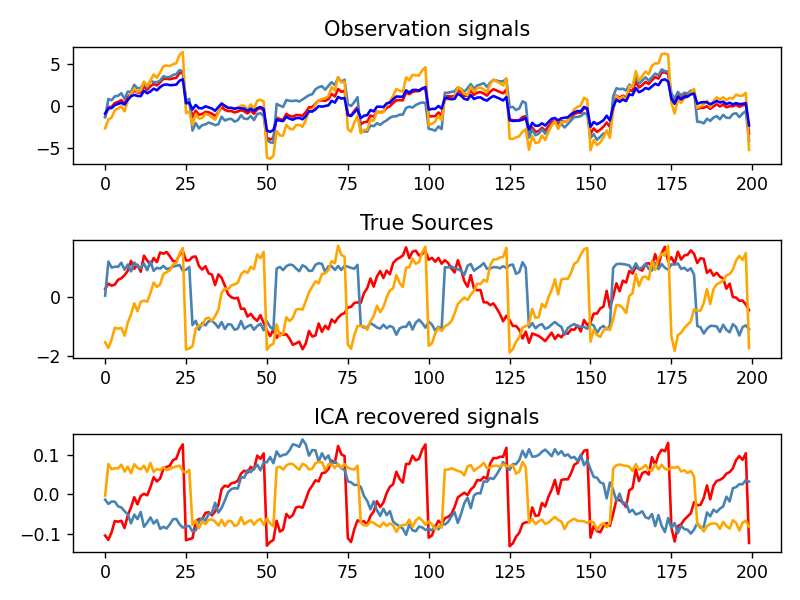

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # 使用了scipy库，安装anaconda会默认安装
from sklearn.decomposition import FastICA

# 数据生成
np.random.seed(0)
n_samples = 200
time = np.linspace(0, 8, n_samples)  # 生成采样数据
s1 = np.sin(2 * time)  # 信号1: 正弦信号
s2 = np.sign(np.sin(3 * time))  # 信号2: 方波信号
s3 = signal.sawtooth(2 * np.pi * time)  # 信号3: 锯齿波信号
S = np.c_[s1, s2, s3]  # 将对象沿第二个轴（按列）连接,shape为(200,3)
S += 0.1 * np.random.normal(size=S.shape)  # 增加噪声
S /= S.std(axis=0)  # 数据归一化
A = np.array([[1,1,1], [0.5,2,1.0], [1.5,1.0,2.0], [1,0.5,0.75]])  # 混淆矩阵
Y = np.dot(S, A.T)  # 生成观测信号,shape为(200,4), 每列代表一个观测信号

# 计算ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(Y)  # 重构原始信号,shape为(200,3)
A_ = ica.mixing_  # 获得估计混淆矩阵,shape为(4,3)

# 开始绘图
plt.figure() 
models = [Y, S, S_, ]
names = ["Observation signals", "True Sources", "ICA recovered signals"]
colors = ["red", "steelblue", "orange", "blue"]
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)  # 准备画每个子图
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)  # 在当前子图中画每个信号
plt.tight_layout()  # 自动调整子图大小


可以看出ICA可以较好的分离出各个成分信号，需要注意的是，ICA分离出的信号顺序与初始的源信号顺序不对应，另外分离出的信号幅值与原始源信号也不对应，但在形态域上具备相似性。